In [12]:
# Naive Bayes Tutorial Part 1: Predicting survival from titanic crash
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [14]:
inputs = df.drop('Survived', axis='columns')
target = df.Survived

In [16]:
dummies = pd.get_dummies(inputs.Sex, dtype='int')
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [18]:
inputs = pd.concat([inputs, dummies], axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [20]:
# dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female
inputs.drop(['Sex', 'male'], axis='columns', inplace=True)
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [21]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [23]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [27]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(10)

,Pclass,Age,Fare,female
0,3,22.000000,7.2500,0
1,1,38.000000,71.2833,1
2,3,26.000000,7.9250,1
3,1,35.000000,53.1000,1
4,3,35.000000,8.0500,0
5,3,29.699118,8.4583,0
6,1,54.000000,51.8625,0
7,3,2.000000,21.0750,0
8,3,27.000000,11.1333,1
9,2,14.000000,30.0708,1


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [30]:
model.fit(X_train, y_train)

GaussianNB()

In [32]:
model.score(X_test, y_test)

0.7910447761194029

In [33]:
X_test[0:10]

,Pclass,Age,Fare,female
530,2,2.000000,26.0000,1
319,1,40.000000,134.5000,1
117,2,29.000000,21.0000,0
548,3,33.000000,20.5250,0
208,3,16.000000,7.7500,1
591,1,52.000000,78.2667,1
248,1,37.000000,52.5542,0
500,3,17.000000,8.6625,0
280,3,65.000000,7.7500,0
709,3,29.699118,15.2458,0


In [37]:
y_test[0:10]

530    1
319    1
117    0
548    0
208    1
591    1
248    1
500    0
280    0
709    1
Name: Survived, dtype: int64

In [34]:
model.predict(X_test[0:10])

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [35]:
model.predict_proba(X_test[0:10])

array([[2.30856952e-01, 7.69143048e-01],
       [9.01895501e-04, 9.99098104e-01],
       [9.25158481e-01, 7.48415194e-02],
       [9.62084180e-01, 3.79158201e-02],
       [4.12193851e-01, 5.87806149e-01],
       [3.52150189e-02, 9.64784981e-01],
       [7.09245902e-01, 2.90754098e-01],
       [9.56003912e-01, 4.39960880e-02],
       [9.70188557e-01, 2.98114427e-02],
       [9.61362783e-01, 3.86372173e-02]])

In [41]:
# Calculate the score using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.8       , 0.776     , 0.712     , 0.78225806, 0.78225806])

In [42]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

<Figure size 1000x700 with 0 Axes>

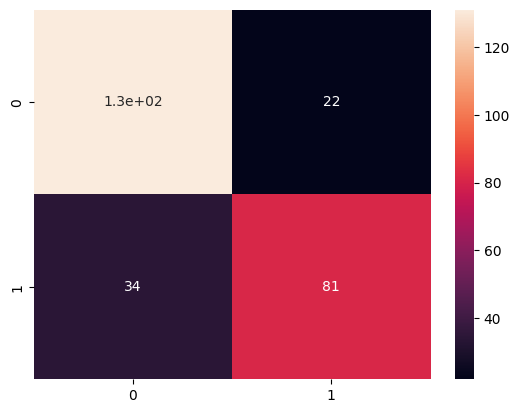

<Figure size 1000x700 with 0 Axes>

In [45]:
import seaborn as sn
sn.heatmap(cm, annot=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))